In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [58]:
# make some dummy data sklearn.datasets import make_blobs
# 1
from sklearn.datasets import make_blobs

data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0, cluster_std=0.5)

In [59]:
data.shape

(2000, 2)

In [60]:
data

array([[-0.99610393,  2.32543854],
       [ 0.31831637,  4.07299503],
       [ 2.15418161,  0.94653906],
       ...,
       [ 1.00621742,  4.19752581],
       [-1.05850641,  3.3030477 ],
       [ 1.64016143,  4.25314658]])

In [61]:
# Initialise centroids 
# 2
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]
centroids

array([[-2.26210488,  3.42309604],
       [-1.89026003,  2.8093007 ],
       [-1.97992831,  7.62055726],
       [-1.14648592,  6.79324395]])

In [62]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

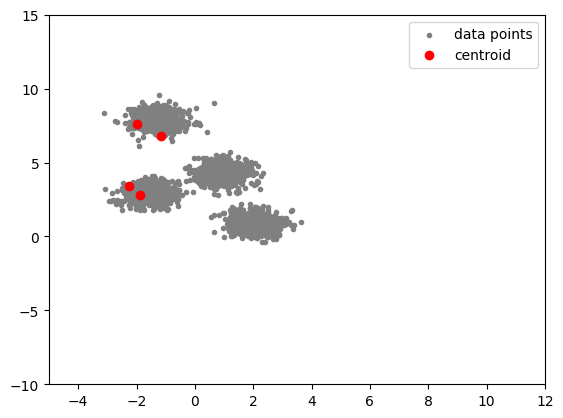

In [63]:
plot(data, centroids)

In [64]:
import math
#point1 (x1,x2)   point2(y1,y2)
#sqrt((x1-y1)**2 + (x2-y2)**2)

sum((data[0] -centroids[0])**2)**0.5

1.675592550929076

In [65]:
print(data.shape)
print(centroids.shape)

(2000, 2)
(4, 2)


In [66]:
# vectorized - 4
(((data - centroids[0])**2).sum(axis=1)**0.5).shape


(2000,)

In [67]:
def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((data - centroid)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist, distance])    
    return dist

In [68]:
d = euclidean(data, centroids)
print(d)

[[1.67559255 1.01667975 5.38573975 4.47033555]
 [2.66100405 2.54454968 4.22695238 3.08956307]
 [5.0632915  4.45279564 7.8506932  6.71404231]
 ...
 [3.35882005 3.21196988 4.54248948 3.37222247]
 [1.20957054 0.96726428 4.41473749 3.49130495]
 [3.98956968 3.81425832 4.94413838 3.77060978]]


In [69]:
print(d.shape)

(2000, 4)


In [70]:
assigned_c = d.argmin(axis=1)
assigned_c

array([1, 1, 1, ..., 1, 1, 3], dtype=int64)

In [71]:
pd.Series(assigned_c).value_counts()


1    1171
3     392
2     336
0     101
Name: count, dtype: int64

In [72]:
data[assigned_c==0].mean(axis=0)

array([-1.72918598,  3.5715256 ])

In [73]:
data[assigned_c==1].mean(axis=0)

array([0.55976203, 2.23307641])

In [74]:
data_size = 1000
num_iters = 15
num_clusters = 4


In [75]:
def calculate_wcss(data,centroids,assigned_centroids):
    wcss = 0 
    for c in range(len(centroids)):
      wcss += np.sum((data[assigned_centroids==c]- centroids[c])**2)
    print("Check_the_shape_of_data ",centroids.shape,wcss)
    return wcss

def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

def update_centroid(data,assigned_centroids, centroids):

    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        # assign the new centroidq
        centroids[c] = new_centroid 
    return centroids

In [76]:

def k_means_algo(num_of_cluster):

  # Initialise centroids
  centroids = data[np.random.choice(range(data.shape[0]), size = (num_of_cluster, ))]
  # Create a list to store which centroid is assigned to each dataset
  assigned_centroids = np.zeros(len(data), dtype = np.int32)
  # Loop over iterations
  for n in range(num_iters):  
    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    centroids = update_centroid(data,assigned_centroids, centroids)
  wcss = calculate_wcss(data=data,centroids=centroids,assigned_centroids=assigned_centroids)
  return wcss

    


Check_the_shape_of_data  (1, 2) 18421.051404351798
Check_the_shape_of_data  (2, 2) 7315.947400368651
Check_the_shape_of_data  (3, 2) 3000.388797353955
Check_the_shape_of_data  (4, 2) 961.3663549726266
Check_the_shape_of_data  (5, 2) 870.8974799892359
Check_the_shape_of_data  (6, 2) 808.8597592506269
Check_the_shape_of_data  (7, 2) 730.8969109636384
Check_the_shape_of_data  (8, 2) 682.4662386004873
Check_the_shape_of_data  (9, 2) 772.9073331415941


Text(0.5, 0, 'No of clusters')

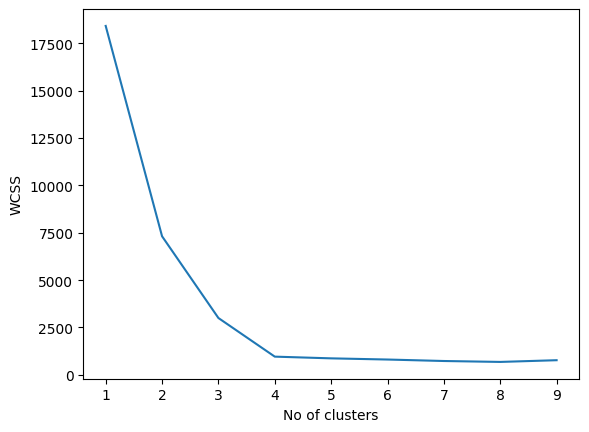

In [81]:
lis_wcss = [] 
for i in range(1,10):    
   lis_wcss.append(k_means_algo(num_of_cluster=i))
plt.plot(list(range(1,10)),lis_wcss,)
plt.ylabel("WCSS")
plt.xlabel("No of clusters")
